In [1]:
import pandas as pd
import utils as u
import feature_generation as fg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/gobel/code/research_env/data/BTCUSD_daily.csv', index_col='timestamp', parse_dates=True)
df = df.drop(['time', 'volumeto', 'conversionType', 'conversionSymbol'], axis=1)
df.columns = ['high', 'low', 'open', 'volume', 'close']
df['vwap'] = u.vwap(df)
df['returns'] = u.returns(df)
df = df.dropna()
df.tail()

,high,low,open,volume,close,vwap,returns
timestamp,,,,,,,
2021-02-07 01:00:00,39721.59,37408.16,39267.01,53823.40,38868.82,38868.82,-0.010141
2021-02-08 01:00:00,46606.82,38063.87,38868.82,138485.21,46437.41,46437.41,0.194721
2021-02-09 01:00:00,48209.59,45051.46,46437.41,98670.48,46509.57,46509.57,0.001554
2021-02-10 01:00:00,47349.86,43743.99,46509.57,72992.80,44854.95,44854.95,-0.035576
2021-02-11 01:00:00,48277.40,44032.66,44854.95,37370.65,47490.41,47490.41,0.058755


In [3]:
unavailable = [48,56,58,59,79,80,82,87,89,90,93,97,100,63,67,69,70,76]

In [6]:
alphas = []

for n in range(101):
    name = 'alpha{}'.format(n+1)
    func = 'fg.{}'.format(name)
    temp_func = eval(func)
    df[name] = temp_func(df)

In [ ]:
df = df.drop(['alpha1', 'alpha29'], axis=1)
df.tail()

<AxesSubplot:>

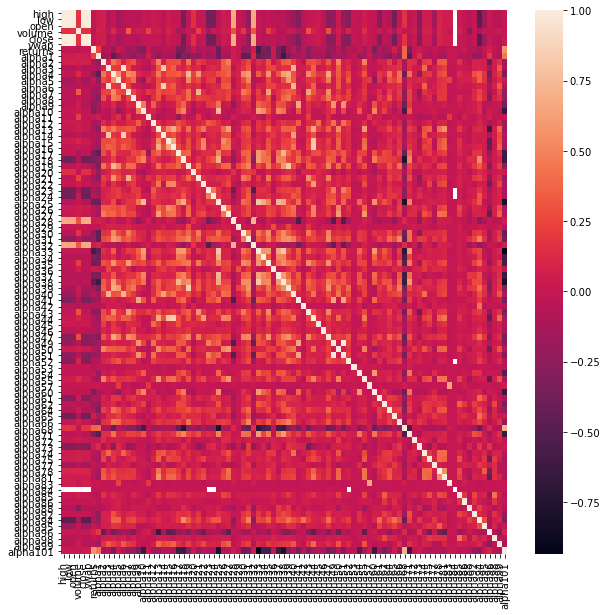

In [7]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), xticklabels=1, yticklabels=1)